In [3]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
with open("hyperparameter_testing/hyperparamater_results.json", "r") as infile:
    data = json.load(infile)

print(f'Combinatatiuons configured {len(data)}\n')

sorted_list = sorted(data, key=lambda k: k['test_accuracy'], reverse=True) 

print(f'time: {sorted_list[0]["time"]}')
print(f'num_conv_layers: {sorted_list[0]["num_conv_layers"]}')
print(f'num_dense_layers: {sorted_list[0]["num_dense_layers"]}')
print(f'conv_1_2_unit: {sorted_list[0]["conv_1_2_unit"]}')
print(f'conv_3_4_unit: {sorted_list[0]["conv_3_4_unit"]}')
print(f'dense_unit: {sorted_list[0]["dense_unit"]}')
print(f'epoch: {sorted_list[0]["epoch"]}')
print(f'test_loss: {sorted_list[0]["test_loss"]:.3f}')
print(f'test_accuracy: {sorted_list[0]["test_accuracy"]:.3f}\n')

#Sum up time taken to complete everything
def sum_times(data):
    total_time = timedelta()
    time_list = [i['time'] for i in data]
    for time_dict in time_list:
        time = datetime.strptime(time_dict, "%H:%M:%S.%f")
        total_time += timedelta(hours=time.hour, minutes=time.minute, seconds=time.second)
    return total_time

print(f'Hyperparamater optimisation took: {sum_times(data)/257}')

Combinatatiuons configured 257

time: 0:07:43.426675
num_conv_layers: 4
num_dense_layers: 3
conv_1_2_unit: 32
conv_3_4_unit: 64
dense_unit: 512
epoch: 25
test_loss: 0.248
test_accuracy: 0.968

Hyperparamater optimisation took: 0:33:01.548638


In [6]:
def plot_results(loss_values, val_loss, loss, accuracy, title):
    """
    Plots evaluation history values of model.
    This plot function was copied from the IMDB lecture notebook.
    """
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    
    epochs = range(1, len(loss_values) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(epochs, loss_values, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title(f'Training and validation loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Test loss: 0.2831648886203766
Test accuracy: 0.9443173408508301


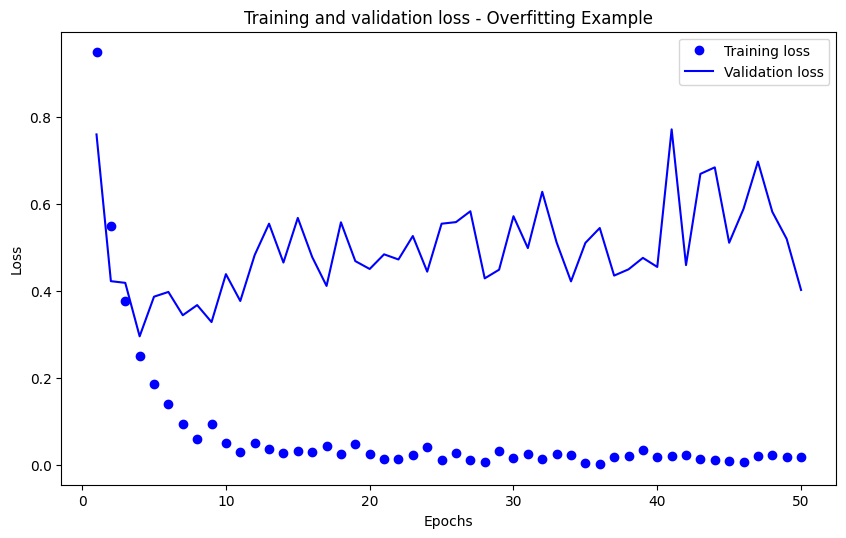

In [10]:
plot_results(data[-9]['loss_values'], data[-9]['val_loss'], data[-9]['test_loss'], data[-9]['test_accuracy'], 'Overfitting Example')

# Visualsing the data

In [2]:
import os
import pandas as pd
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from PIL import Image, ImageEnhance
import random

In [1]:
train_dir = 'Datasets_cleaned/240_resolution/brain_tumour_small/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    if label != '.DS_Store':
        for image in os.listdir(train_dir+label):
            train_paths.append(train_dir+label+'/'+image)
            train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

NameError: name 'os' is not defined

In [54]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

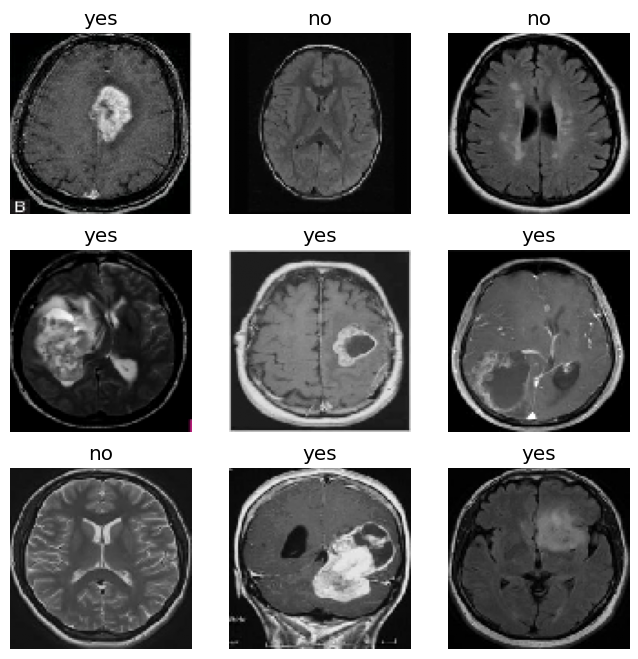

In [81]:
IMAGE_SIZE = 100

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(train_paths[40:50])
labels = train_labels[40:50]
fig = plt.figure(figsize=(8, 8))
for x in range(1, 10):
    fig.add_subplot(3, 3, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

Text(0.5, 1.0, 'Hyperparameter Optimisation outcome (Sorted by accuracy)')

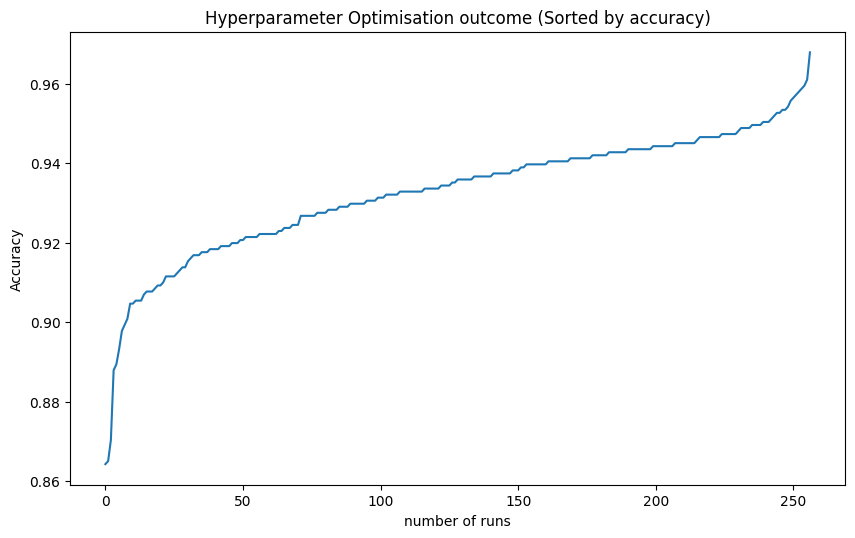

In [24]:
import json
import matplotlib.pyplot as plt

with open('hyperparameter_testing/hyperparamater_results.json', 'r') as para_file:
    data = json.load(para_file)
    
sorted_acc = sorted(data, key=lambda k: k['test_accuracy'], reverse=False) 

accuracies = []
runs = list(range(len(data)))
for i in sorted_acc:
    accuracies.append(i['test_accuracy'])
    
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(runs, accuracies)
plt.xlabel('number of runs')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Optimisation outcome (Sorted by accuracy)')